#**Fundamentals of pytorch**

In [126]:
import torch
import numpy as np
print(torch.__version__)

2.0.0+cu118


##**Tensor_creation**

In [127]:
scalar=torch.tensor(7)
scalar

tensor(7)

In [128]:
scalar.ndim

0

In [129]:
scalar.item() #returns the tensor's value alone ie as a python int

7

In [130]:
vector= torch.tensor([1,2], 
                     dtype=None,  #select the dtype of this tensor
                     device= None, #None= CPU; what device your tensor is on
                     requires_grad=False) #wheather or not to track the gradients with this tensor operation
vector #this is a row vector

tensor([1, 2])

In [131]:
vector.ndim

1

In [132]:
vector.shape

torch.Size([2])

In [133]:
MATRIX= torch.tensor([[1,2],[3,4]])
MATRIX

tensor([[1, 2],
        [3, 4]])

In [134]:
MATRIX.ndim

2

In [135]:
MATRIX.shape

torch.Size([2, 2])

In [136]:
TENSOR=torch.tensor([[[1,2,3]],[[3,4,5]],[[6,7,8]]])
TENSOR

tensor([[[1, 2, 3]],

        [[3, 4, 5]],

        [[6, 7, 8]]])

In [137]:
TENSOR.ndim

3

In [138]:
TENSOR.shape

torch.Size([3, 1, 3])

###**Random Tensor**

In [139]:
rand_tensor=torch.rand((3,1,3))
rand_tensor

tensor([[[0.2969, 0.5557, 0.6806]],

        [[0.6111, 0.9742, 0.7815]],

        [[0.4516, 0.5851, 0.6212]]])

###**Random Image**

In [140]:
import matplotlib.pyplot as plt

In [141]:
rand_img=torch.rand((224,224,3))
rand_img.ndim, rand_img.shape

(3, torch.Size([224, 224, 3]))

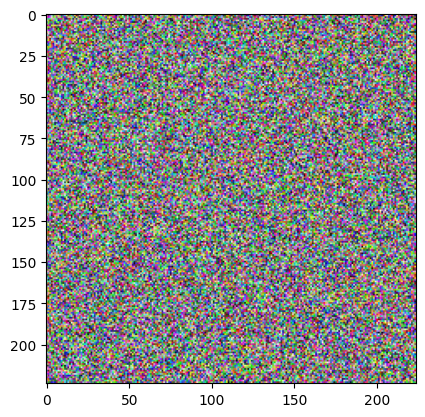

In [142]:
plt.imshow(rand_img);

###**Tensor Range**

In [143]:
tensor_range=torch.arange(1,10)
tensor_range

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

###**Using "like"**: gives the same shape

In [144]:
tensor_like= torch.ones_like(TENSOR)
tensor_like

tensor([[[1, 1, 1]],

        [[1, 1, 1]],

        [[1, 1, 1]]])

##**Tensor operations**

In [145]:
vector+10

tensor([11, 12])

In [146]:
vector*10

tensor([10, 20])

In [147]:
vector

tensor([1, 2])

In [148]:
a=torch.mul(MATRIX, 3) #element wise multi
multiplier=torch.tensor([[3,2]])
b=torch.matmul(multiplier, MATRIX) #matrix multi
print(f"original matrix\n{MATRIX}\n\nelement_wise mult with 3\n{a}\n\nmatmul with [[3,2]]\n{b}")

original matrix
tensor([[1, 2],
        [3, 4]])

element_wise mult with 3
tensor([[ 3,  6],
        [ 9, 12]])

matmul with [[3,2]]
tensor([[ 9, 14]])


###**Tensor aggregations**

In [149]:
MATRIX

tensor([[1, 2],
        [3, 4]])

In [150]:
torch.max(MATRIX)

tensor(4)

In [151]:
torch.min(MATRIX)

tensor(1)

In [152]:
torch.mean(MATRIX.type(torch.float32))

tensor(2.5000)

###**Reshape**

In [153]:
MATRIX_test=torch.arange(1,10)
MATRIX_test

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [154]:
MATRIX_test_re=MATRIX_test.reshape(3,3)
MATRIX_test_re

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [155]:
MATRIX_view= MATRIX_test.view(3,3)
MATRIX_view #Note: this shares the same memory as MATRIX_test so any changes here will appear in MATRIX_test as well.

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

###**Stacking**

In [156]:
x_stack=torch.stack([MATRIX_test, MATRIX_test, MATRIX_test], dim=1)
x_stack

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4],
        [5, 5, 5],
        [6, 6, 6],
        [7, 7, 7],
        [8, 8, 8],
        [9, 9, 9]])

###**Squeeze and Unsqueeze**

In [157]:
x=torch.arange(1,10)
x

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [158]:
x_t=x.reshape(9,1)
x_t

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [159]:
x_t_sq=x_t.squeeze()
x_t_sq

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [160]:
x_t_ex=x_t_sq.unsqueeze(dim=0)
x_t_ex

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

###**Indexing**

In [161]:
x=torch.arange(1,10).reshape(1,3,3)
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [162]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [163]:
x[0][2]

tensor([7, 8, 9])

In [164]:
x[0][2][2], x[:,2,2]

(tensor(9), tensor([9]))

In [165]:
print(x[:,0])
print(x[0,:])

tensor([[1, 2, 3]])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [166]:
x[:,:,1]

tensor([[2, 5, 8]])

###**Numpy and Torch**

In [167]:
import numpy as np #numpy only works on CPU

a=np.arange(1,10) #default dtype= float 64 and this will be reflected in tensor as well
tensor=torch.from_numpy(a)
tensor

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [168]:
np_arr=tensor.numpy()
np_arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

###**Random seed**

In [169]:
torch.manual_seed(42)
t1=torch.rand(3,3)
t2=torch.rand(3,3)
print("T1:\n",t1)
print("T2:\n",t2)
print(t1==t2)

T1:
 tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408]])
T2:
 tensor([[0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411],
        [0.4294, 0.8854, 0.5739]])
tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])


In [170]:
torch.manual_seed(42)
t1=torch.rand(3,3)
torch.manual_seed(42) #manual_seed is applicable only till the first rand process.
t2=torch.rand(3,3)
print("T1:\n",t1)
print("T2:\n",t2)
print(t1==t2)

T1:
 tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408]])
T2:
 tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408]])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


#**Basic Regression**

In [171]:
device= ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device:{device}")

Using device:cpu


###**Getting data**

In [172]:
weight= 1.5
bias= 2
step= 0.02
X= torch.arange(0, 1, step).unsqueeze(dim=1)
y= weight*X + bias
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[2.0000],
         [2.0300],
         [2.0600],
         [2.0900],
         [2.1200]]))

In [173]:
split=int(0.8*len(X))
X_train, X_test=X[:split], X[split:]
y_train, y_test=y[:split], y[split:]

In [174]:
 import matplotlib.pyplot as plt 
 def plot(x_train=X_train, y_train= y_train, x_test=X_test, y_test=y_test, predictions=None):
   plt.figure(figsize=(10, 7))
   plt.scatter(x_train, y_train, c="r", s=3, label="Training data")
   plt.scatter(x_test, y_test, c="b", s=3, label="Testing data")
   if predictions is not None:
    plt.scatter(x_test, predictions, c="g", s=2, label="Predictions")
   plt.legend(prop={"size":14});

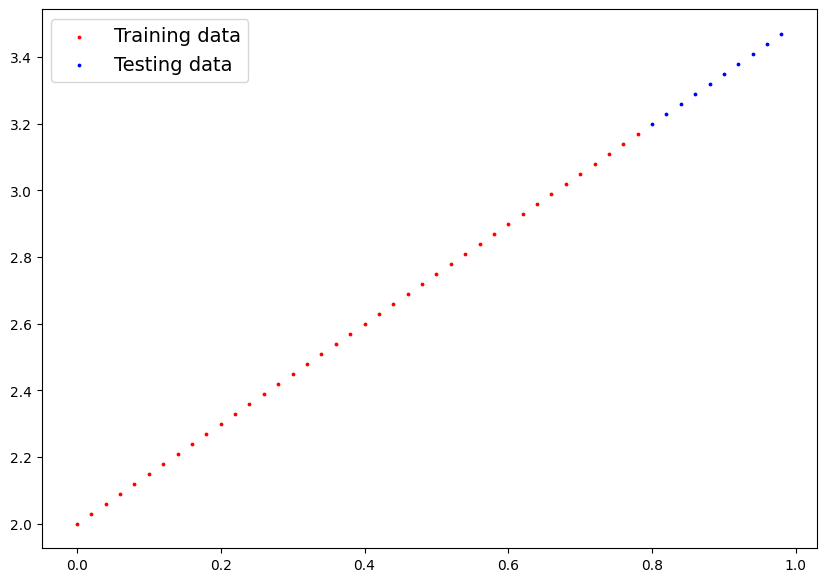

In [175]:
plot()

##**LR Model**

In [176]:
class lr(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer=torch.nn.Linear(in_features=1, out_features=1) #using predefined layers instead of parameters
  def forward(self, x: torch.Tensor)->torch.Tensor:
    return layer(x)

In [177]:
model_lr_0=lr()
model_lr_0.state_dict()

OrderedDict([('layer.weight', tensor([[-0.7336]])),
             ('layer.bias', tensor([0.8692]))])

In [178]:
class LR(torch.nn.Module): 
  def __init__(self):
    super().__init__()
    self.weights= torch.nn.Parameter(torch.randn(1,
                                                 requires_grad=True,
                                                 dtype=torch.float))
    self.bias= torch.nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
    
  #Forward propagation func. must be setup manually whenever  creating a custom network
  def forward(self, x:  torch.Tensor)->torch.Tensor: #x is a torchTensor and the output of the forward is yet again a torchTensor[->]
    return self.weights*x+self.bias

In [179]:
model_lr=LR()
model_lr

LR()

In [180]:
model_lr.parameters(), list(model_lr.parameters())

(<generator object Module.parameters at 0x7fd974a00430>,
 [Parameter containing:
  tensor([-0.0107], requires_grad=True),
  Parameter containing:
  tensor([-1.2492], requires_grad=True)])

In [181]:
model_lr.state_dict()

OrderedDict([('weights', tensor([-0.0107])), ('bias', tensor([-1.2492]))])

In [182]:
next(model_lr.parameters()).device

device(type='cpu')

In [183]:
model_lr(X_test) #this method keeps track of gradients and can thus prove to be slower

tensor([[-1.2577],
        [-1.2579],
        [-1.2582],
        [-1.2584],
        [-1.2586],
        [-1.2588],
        [-1.2590],
        [-1.2592],
        [-1.2594],
        [-1.2597]], grad_fn=<AddBackward0>)

In [184]:
with torch.inference_mode(): #this does not keep track of gradients and is hence faster but carries less information
  y_preds=model_lr(X_test)

y_preds

tensor([[-1.2577],
        [-1.2579],
        [-1.2582],
        [-1.2584],
        [-1.2586],
        [-1.2588],
        [-1.2590],
        [-1.2592],
        [-1.2594],
        [-1.2597]])

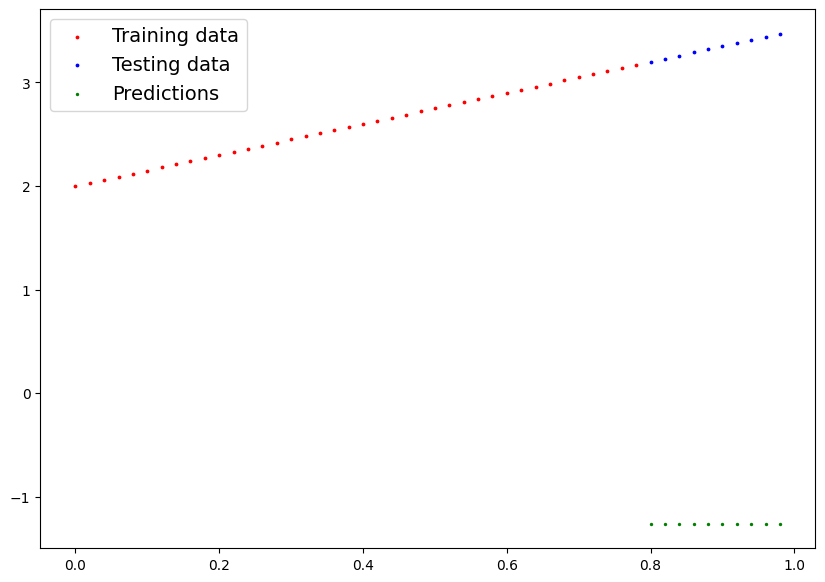

In [185]:
plot(predictions=y_preds)

In [186]:
from torch import nn

#loss fn:
loss_fn=nn.L1Loss()

#optimizer:
optimizer= torch.optim.Adam(params= model_lr.parameters(),
                           lr=0.1)

In [187]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)

In [188]:
model_lr.to(device) #shifting parameters onto device
X_train=X_train.to(device) #shifting the given data onto device
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

###**Training Loop**

In [189]:
epochs=200
val_loss_epoch=[]
train_loss_epoch=[]
for i in range(epochs):
  
  #1. set the model in training mode
  model_lr.train()

  #2. forward pass
  y_pred=model_lr(X_train)

  #3. calculate the loss
  loss=loss_fn(y_pred, y_train)

  #4. optimizer zero grad [instantiate grad to 0 else gradient will accumulate]
  optimizer.zero_grad()

  #5. perform back propagation on the loss wrt the parameters of the model (calculate gradients of each parameter)
  loss.backward()

  #6. use optimizer to perform gradient descent
  optimizer.step()

  #7. Get into eval mode to ignore unnecesary computation
  model_lr.eval()

  #8. loss_values
  with torch.inference_mode():
    y_pred=model_lr(X_test)
    val_loss=loss_fn(y_pred, y_test)
    train_loss_epoch.append(loss.detach().cpu().numpy())
    val_loss_epoch.append(val_loss.detach().cpu().numpy())
    if i%10==0:
      print(f"epoch:{i} train_mae:{loss.detach().cpu().numpy(): .4f} val_mae:{val_loss.detach().cpu().numpy() :.4f}")

## Loss arrays
train_loss_epoch= np.array(train_loss_epoch)
val_loss_epoch= np.array(val_loss_epoch)

epoch:0 train_mae: 3.8384 val_mae:4.4047
epoch:10 train_mae: 2.4484 val_mae:2.5147
epoch:20 train_mae: 1.0584 val_mae:0.6247
epoch:30 train_mae: 0.3200 val_mae:1.0025
epoch:40 train_mae: 0.3401 val_mae:0.8478
epoch:50 train_mae: 0.2057 val_mae:0.1094
epoch:60 train_mae: 0.1149 val_mae:0.3254
epoch:70 train_mae: 0.0475 val_mae:0.0188
epoch:80 train_mae: 0.0226 val_mae:0.0114
epoch:90 train_mae: 0.0053 val_mae:0.0274
epoch:100 train_mae: 0.0143 val_mae:0.0458
epoch:110 train_mae: 0.0199 val_mae:0.0447
epoch:120 train_mae: 0.0176 val_mae:0.0033
epoch:130 train_mae: 0.0080 val_mae:0.0040
epoch:140 train_mae: 0.0108 val_mae:0.0082
epoch:150 train_mae: 0.0031 val_mae:0.0037
epoch:160 train_mae: 0.0047 val_mae:0.0139
epoch:170 train_mae: 0.0278 val_mae:0.0251
epoch:180 train_mae: 0.0106 val_mae:0.0231
epoch:190 train_mae: 0.0203 val_mae:0.0331


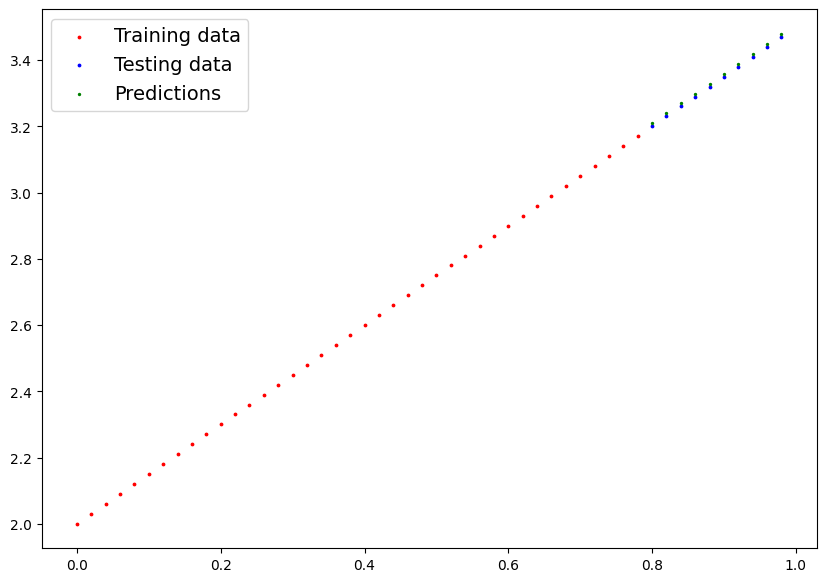

In [190]:
plot(predictions=y_pred.detach().cpu().numpy())

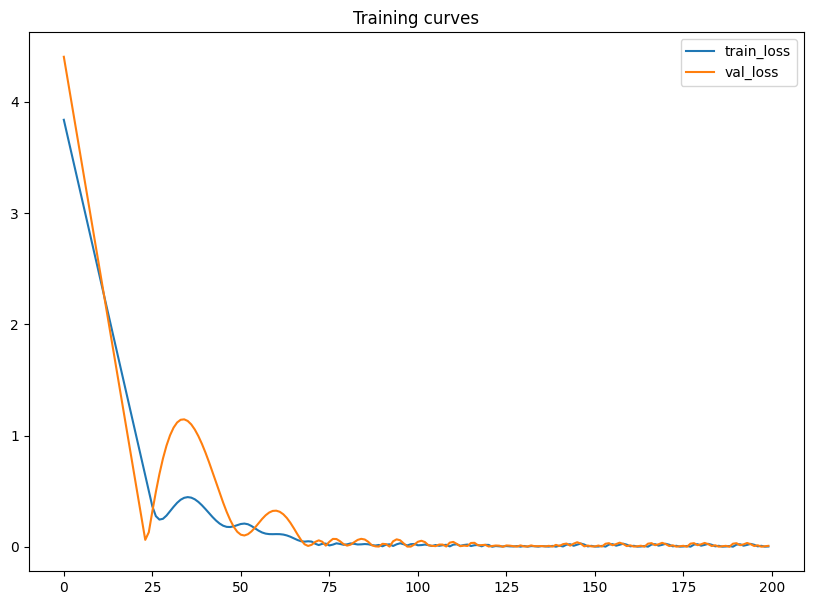

In [191]:
plt.figure(figsize=(10,7))
plt.plot(train_loss_epoch, label="train_loss")
plt.plot(val_loss_epoch, label="val_loss")
plt.title("Training curves")
plt.legend();

In [192]:
list(model_lr.parameters())

[Parameter containing:
 tensor([1.5030], requires_grad=True),
 Parameter containing:
 tensor([2.0066], requires_grad=True)]

In [193]:
weight, bias

(1.5, 2)

###**Saving and Loading**

In [194]:
torch.save(obj=model_lr.state_dict(), f="model_lr")

In [195]:
loaded_model_lr= LR() #instantiate the model first
loaded_model_lr.state_dict()

OrderedDict([('weights', tensor([-1.2284])), ('bias', tensor([0.5294]))])

In [196]:
loaded_model_lr.load_state_dict(torch.load("model_lr"))
loaded_model_lr.state_dict()

OrderedDict([('weights', tensor([1.5030])), ('bias', tensor([2.0066]))])

In [197]:
loaded_model_lr.to(device) #to ensure that it is set correctly on computation device

LR()

In [198]:
next(loaded_model_lr.parameters()).device

device(type='cpu')

#**Basic Binary-Classification**

###**Gettinng data**

In [199]:
from sklearn.datasets import make_circles

n_samples=1000
x,y= make_circles(n_samples, noise=.03)
x[:3], y[:3]

(array([[-0.5071106 , -0.62551989],
        [ 0.39342864,  0.72606813],
        [-0.35323038,  0.69649567]]),
 array([1, 1, 1]))

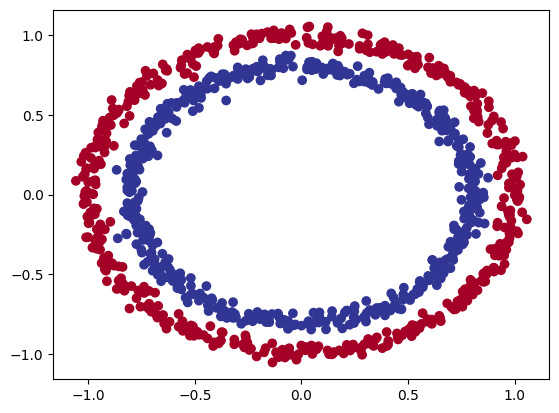

In [200]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu); #c=y -> colour the data on the basis of labels

In [201]:
type(x), type(y), x.dtype, y.dtype

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('int64'))

In [202]:
from sklearn.model_selection import train_test_split

x_t=torch.from_numpy(x).type(torch.float) #converting numpy to tensor, float64 to float 32
y_t=torch.from_numpy(y).type(torch.float) 

x_train, x_test, y_train, y_test= train_test_split(x_t, y_t, test_size=0.2)
len(x_train), len(x_test)

(800, 200)

In [203]:
type(x_t), x_t.dtype

(torch.Tensor, torch.float32)

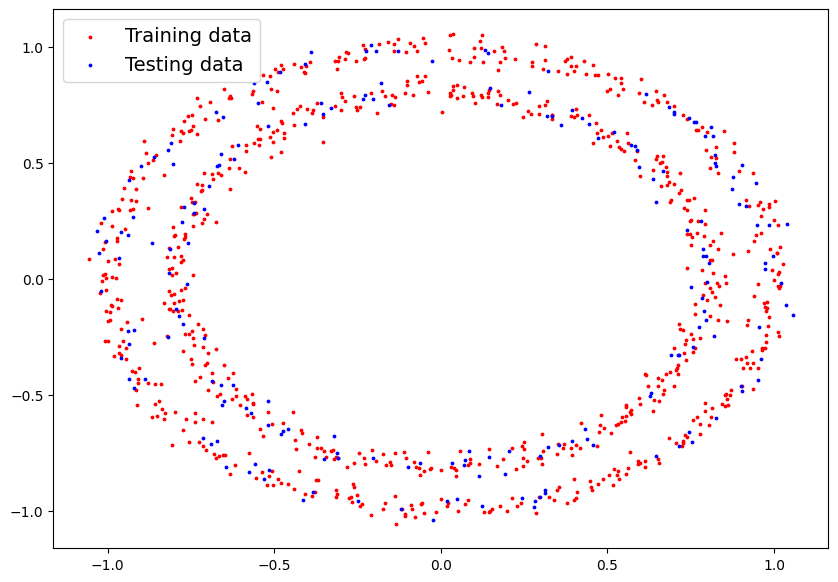

In [204]:
plot(x_train[:,0], x_train[:,1], x_test[:,0], x_test[:,1])

##**Classification Model**

In [205]:
import torch
import numpy as np
from torch import nn

In [206]:
device="cuda" if torch.cuda.is_available() else "cpu" 
print(f"Device:{device}")

Device:cpu


In [207]:
class clf(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1= nn.Linear(in_features=2, out_features= 4)
    self.layer_2= nn.Linear(in_features=4, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

In [208]:
model_clf=clf()
model_clf.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1802, -0.3258],
                      [-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997]])),
             ('layer_1.bias', tensor([-0.4252,  0.0667, -0.6984,  0.6386])),
             ('layer_2.weight',
              tensor([[-0.4247,  0.3860,  0.0832, -0.1624]])),
             ('layer_2.bias', tensor([0.3090]))])

**Replicating the same model but using Sequential**

In [209]:
model_clf= nn.Sequential(nn.Linear(in_features=2, out_features=10),
                         nn.ReLU(),
                         nn.Linear(in_features=10, out_features=10),
                         nn.ReLU(),
                         nn.Linear(in_features=10, out_features=16),
                         nn.ReLU(),
                         nn.Linear(in_features=16, out_features=1))
model_clf.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1102,  0.5713],
                      [ 0.0773, -0.2230],
                      [ 0.1900, -0.1918],
                      [ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732],
                      [-0.5424,  0.5802],
                      [ 0.2037,  0.2929]])),
             ('0.bias',
              tensor([ 0.2236, -0.0123,  0.5534, -0.5024,  0.0445, -0.4826,  0.2180, -0.2435,
                       0.2167, -0.1473])),
             ('2.weight',
              tensor([[ 0.2623, -0.1874, -0.1886, -0.1886,  0.2844,  0.1054,  0.3043, -0.2610,
                       -0.3137, -0.2474],
                      [-0.2127,  0.1281,  0.1132,  0.2628, -0.1633, -0.2156,  0.1678, -0.1278,
                        0.1919, -0.0750],
                      [ 0.1809, -0.2457, -0.1596,  0.0964,  0.0669, -0.0806,  0.1885,  0.2

In [210]:
model_clf.to(device)
model_clf.eval()
with torch.inference_mode():
  y_pred_logits=model_clf(x_test.to(device))
  y_pred= torch.sigmoid(y_pred_logits)
y_pred[:3], y_pred.round()[:3]

(tensor([[0.4381],
         [0.4396],
         [0.4395]]),
 tensor([[0.],
         [0.],
         [0.]]))

In [211]:
model_clf

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
)

In [212]:
def acc_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item() #item gives the python int of scalar
  acc=correct/len(y_pred)
  return acc

In [213]:
loss_fn= nn.BCEWithLogitsLoss() #if the last layer does have a sigmoid activation
optimizer= torch.optim.Adam(params= model_clf.parameters())

###**Training Loop**

In [214]:
epochs=500
val_loss, val_acc=[], []
train_loss_l, train_acc_l=[], [] 

for epoch in range(epochs):
  
  #1. train mode
  model_clf.train()

  #2. forward pass
  y_pred_logits=model_clf(x_train.to(device)).squeeze()
  y_pred= torch.round(torch.sigmoid(y_pred_logits))

  #3. calculate the loss
  loss=loss_fn(y_pred_logits, y_train.to(device))

  #4. zero grad
  optimizer.zero_grad()

  #5. gradient calculation [back propogation]
  loss.backward()

  #6. gradient descent
  optimizer.step()

  #7. eval mode
  model_clf.eval()

  #8 training/test loss
  with torch.inference_mode():

    y_pred_train=torch.round(y_pred)

    y_pred_test_logits=model_clf(x_test.to(device)).squeeze()
    y_pred_test=torch.round(torch.sigmoid(y_pred_test_logits))
    
    train_loss=loss.item()
    test_loss= loss_fn(y_pred_test, y_test.to(device)).item()
    train_acc=acc_fn(y_train.to(device), y_pred_train) #numpy computations can be done only on cpu
    test_acc=acc_fn(y_test.to(device), y_pred_test)

    if (epoch%10==0):
      print(f"epoch:{epoch} train_loss:{train_loss :.4f} val_loss:{test_loss :.4f} train_acc:{train_acc :.3f} val_acc:{test_acc :.3f}")

    train_loss_l.append(train_loss)
    val_loss.append(test_loss)
    train_acc_l.append(train_acc)
    val_acc.append(test_acc)

train_loss=np.array(train_loss_l)
val_loss=np.array(val_loss)
train_acc= np.array(train_acc_l)
val_acc= np.array(val_acc)

epoch:0 train_loss:0.7009 val_loss:0.6931 train_acc:0.502 val_acc:0.490
epoch:10 train_loss:0.6987 val_loss:0.6931 train_acc:0.502 val_acc:0.490
epoch:20 train_loss:0.6969 val_loss:0.6931 train_acc:0.502 val_acc:0.490
epoch:30 train_loss:0.6954 val_loss:0.6931 train_acc:0.502 val_acc:0.490
epoch:40 train_loss:0.6941 val_loss:0.6931 train_acc:0.502 val_acc:0.490
epoch:50 train_loss:0.6930 val_loss:0.6931 train_acc:0.502 val_acc:0.490
epoch:60 train_loss:0.6921 val_loss:0.6931 train_acc:0.502 val_acc:0.490
epoch:70 train_loss:0.6912 val_loss:0.7168 train_acc:0.497 val_acc:0.510
epoch:80 train_loss:0.6899 val_loss:0.7095 train_acc:0.516 val_acc:0.545
epoch:90 train_loss:0.6883 val_loss:0.6922 train_acc:0.581 val_acc:0.600
epoch:100 train_loss:0.6865 val_loss:0.6946 train_acc:0.581 val_acc:0.600
epoch:110 train_loss:0.6842 val_loss:0.6970 train_acc:0.588 val_acc:0.600
epoch:120 train_loss:0.6813 val_loss:0.6840 train_acc:0.645 val_acc:0.650
epoch:130 train_loss:0.6776 val_loss:0.6852 train

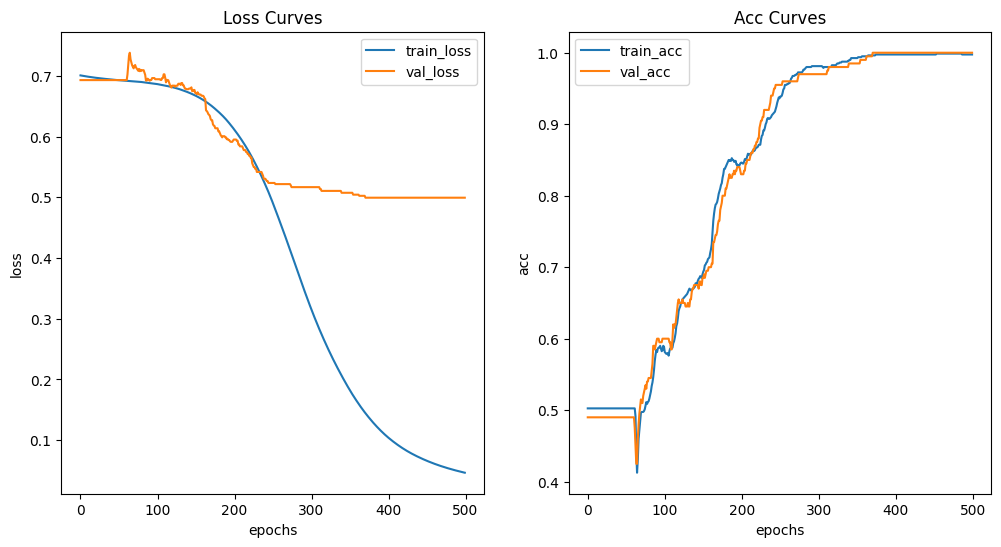

In [215]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(train_loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss Curves")
plt.legend();

plt.subplot(1,2,2)
plt.plot(train_acc, label="train_acc")
plt.plot(val_acc, label="val_acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.title("Acc Curves")
plt.legend();

###**Decision boundary**

In [216]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions already exists, skipping download")
else:
  print("downloading helper_functions")
  file=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(file.content)

from helper_functions import plot_decision_boundary

helper_functions already exists, skipping download


In [217]:
y_train=y_train.squeeze()
y_test=y_test.squeeze()

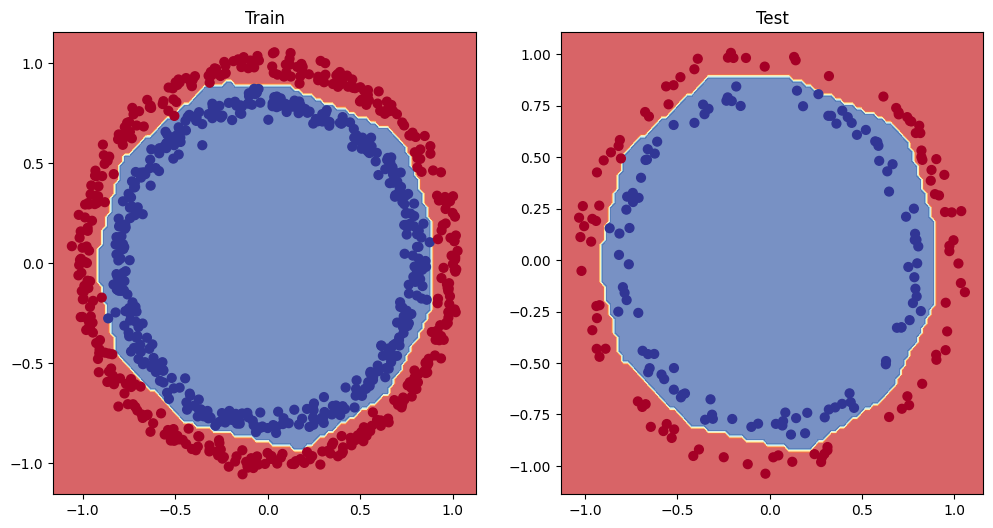

In [218]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_clf, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_clf, x_test, y_test)

###**Saving and Loading**

In [219]:
torch.save(obj=model_clf.state_dict(), f="model_clf")

In [220]:
loaded_model_clf=nn.Sequential(nn.Linear(in_features=2, out_features=10),
                         nn.ReLU(),
                         nn.Linear(in_features=10, out_features=10),
                         nn.ReLU(),
                         nn.Linear(in_features=10, out_features=16),
                         nn.ReLU(),
                         nn.Linear(in_features=16, out_features=1))
model_clf.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1167,  1.3052],
                      [ 0.6341, -0.9511],
                      [ 0.8478, -0.1951],
                      [ 1.0602,  1.1653],
                      [ 0.9961, -0.7377],
                      [ 0.4082,  0.1265],
                      [ 0.6317, -0.6917],
                      [-1.3527, -0.8991],
                      [-0.5160,  0.4541],
                      [ 0.9244,  0.3318]])),
             ('0.bias',
              tensor([-0.1304,  0.0653,  1.1089, -0.6870, -0.1548, -0.4826,  0.9195, -0.5929,
                       0.6186, -0.3833])),
             ('2.weight',
              tensor([[ 4.0092e-01,  4.4958e-01,  3.5278e-01,  5.6384e-01,  9.3945e-01,
                        1.0538e-01,  9.2051e-01,  5.2700e-01, -8.3950e-01,  4.8220e-01],
                      [-7.2647e-01, -6.0755e-01,  5.9893e-01, -3.4064e-01, -8.9167e-01,
                       -2.1558e-01,  2.6483e-01, -8.4207e-01, -7.0906e-02, -7.5613e-01],
          

In [221]:
loaded_model_clf.load_state_dict(torch.load("model_clf"))
loaded_model_clf.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
)

In [222]:
loaded_model_clf.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1167,  1.3052],
                      [ 0.6341, -0.9511],
                      [ 0.8478, -0.1951],
                      [ 1.0602,  1.1653],
                      [ 0.9961, -0.7377],
                      [ 0.4082,  0.1265],
                      [ 0.6317, -0.6917],
                      [-1.3527, -0.8991],
                      [-0.5160,  0.4541],
                      [ 0.9244,  0.3318]])),
             ('0.bias',
              tensor([-0.1304,  0.0653,  1.1089, -0.6870, -0.1548, -0.4826,  0.9195, -0.5929,
                       0.6186, -0.3833])),
             ('2.weight',
              tensor([[ 4.0092e-01,  4.4958e-01,  3.5278e-01,  5.6384e-01,  9.3945e-01,
                        1.0538e-01,  9.2051e-01,  5.2700e-01, -8.3950e-01,  4.8220e-01],
                      [-7.2647e-01, -6.0755e-01,  5.9893e-01, -3.4064e-01, -8.9167e-01,
                       -2.1558e-01,  2.6483e-01, -8.4207e-01, -7.0906e-02, -7.5613e-01],
          

In [223]:
loaded_model_clf.eval()
with torch.inference_mode():
  logits=loaded_model_clf(x_test.to(device))
  y_preds= torch.round(torch.sigmoid(logits)).squeeze()
  
acc_fn(y_preds, y_test)

1.0

#**Basic Mulit-Classification**

In [224]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

##**Getting data**

In [225]:
import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

x_blob, y_blob= make_blobs(n_samples=1000,
                           n_features=2,
                           centers=5,
                           cluster_std=1.5)

x_blob[:5], y_blob[:5]

(array([[ 0.92444608,  4.73391025],
        [-7.45597641, 10.39538192],
        [-3.07031734,  8.16859281],
        [ 9.25614544, -4.26637869],
        [ 7.50638865,  9.66893282]]),
 array([0, 1, 4, 3, 2]))

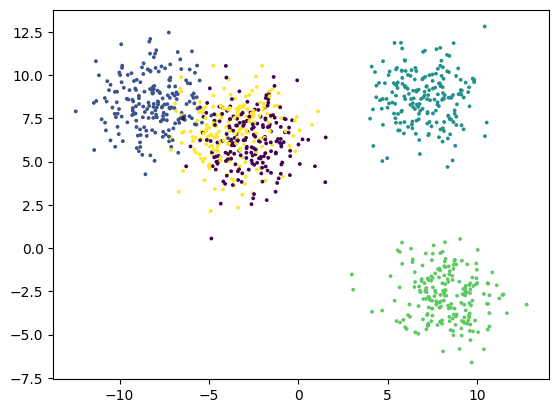

In [226]:
plt.scatter(x_blob[:,0], x_blob[:,1], c=y_blob, cmap='viridis', s=3);

In [227]:
x_blob.dtype, type(x_blob)

(dtype('float64'), numpy.ndarray)

In [228]:
x, y= torch.from_numpy(x_blob).type(torch.LongTensor).to(device), torch.from_numpy(y_blob).type(torch.LongTensor).to(device) #converting to suitable dtype
type(x), x.dtype

(torch.Tensor, torch.int64)

In [229]:
x_train, x_test, y_train, y_test= train_test_split(x, y)
type(x_train), x_train.dtype

(torch.Tensor, torch.int64)

##**Multi-Class Model**

In [230]:
model_multi_clf= nn.Sequential(nn.Linear(2,  16),
                               nn.ReLU(),
                               nn.Linear(16, 32),
                               nn.ReLU(),
                               nn.Linear(32, 64),
                               nn.ReLU(),
                               nn.Linear(64, 5),
                               nn.Softmax()) #this layer does not make much of difference
model_multi_clf

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=5, bias=True)
  (7): Softmax(dim=None)
)

In [231]:
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model_multi_clf.parameters())

In [232]:
def acc_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item() #item gives the python int of scalar
  acc=correct/len(y_pred)
  return acc

###**Training Loop**

In [233]:
epochs=500
val_loss_l, train_loss_l=[], []
val_acc_l, train_acc_l=[], []
for i in range(epochs):
  model_multi_clf.train()

  y_logits=model_multi_clf(x_train.type(torch.float))
  y_preds= torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
  train_acc=acc_fn(y_train, y_preds)

  loss=loss_fn(y_logits, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_multi_clf.eval()
  with torch.inference_mode():

    y_logits_test=model_multi_clf(x_test.type(torch.float))
    y_preds_test= torch.argmax(torch.softmax(y_logits_test, dim=1), dim=1)
    val_loss=loss_fn(y_logits_test, y_test)
    val_acc=acc_fn(y_test, y_preds_test)

    val_loss_l.append(val_loss.item())
    val_acc_l.append(val_acc)
    train_loss_l.append(loss.item())
    train_acc_l.append(train_acc)

    if i%10==0:
      print(f"epoch:{i} train_loss:{loss.item() :.4f} train_acc:{train_acc :.3f} val_loss:{val_loss.item() :.4f} val_acc:{val_acc :.3f} ")

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch:0 train_loss:1.6007 train_acc:0.201 val_loss:1.5956 val_acc:0.200 
epoch:10 train_loss:1.5170 train_acc:0.681 val_loss:1.5115 val_acc:0.672 
epoch:20 train_loss:1.4082 train_acc:0.595 val_loss:1.3985 val_acc:0.616 
epoch:30 train_loss:1.3045 train_acc:0.595 val_loss:1.2941 val_acc:0.616 
epoch:40 train_loss:1.2473 train_acc:0.595 val_loss:1.2415 val_acc:0.616 
epoch:50 train_loss:1.2128 train_acc:0.679 val_loss:1.2128 val_acc:0.672 
epoch:60 train_loss:1.1883 train_acc:0.705 val_loss:1.1918 val_acc:0.692 
epoch:70 train_loss:1.1694 train_acc:0.720 val_loss:1.1767 val_acc:0.712 
epoch:80 train_loss:1.1553 train_acc:0.756 val_loss:1.1671 val_acc:0.728 
epoch:90 train_loss:1.1450 train_acc:0.757 val_loss:1.1604 val_acc:0.740 
epoch:100 train_loss:1.1374 train_acc:0.765 val_loss:1.1558 val_acc:0.744 
epoch:110 train_loss:1.1315 train_acc:0.765 val_loss:1.1521 val_acc:0.748 
epoch:120 train_loss:1.1264 train_acc:0.765 val_loss:1.1487 val_acc:0.748 
epoch:130 train_loss:1.1211 train_ac

In [234]:
train_loss, train_acc=np.array(train_loss_l), np.array(train_acc_l)
test_loss, test_acc=np.array(val_loss_l), np.array(val_acc_l)

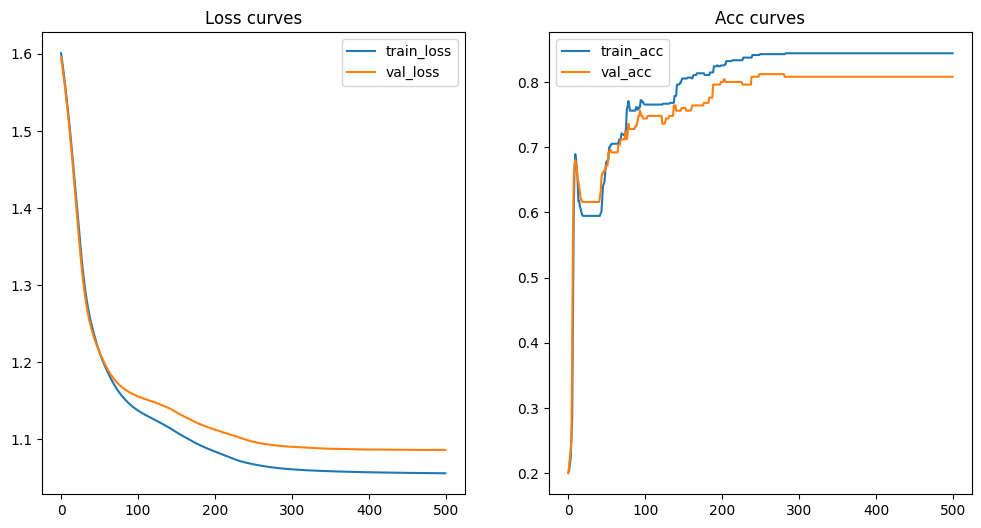

In [235]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.plot(train_loss, label="train_loss")
plt.plot(test_loss, label="val_loss")
plt.legend()
plt.title("Loss curves")

plt.subplot(1,2,2)
plt.plot(train_acc, label="train_acc")
plt.plot(test_acc, label="val_acc")
plt.legend()
plt.title("Acc curves");

###**Decision boundary**

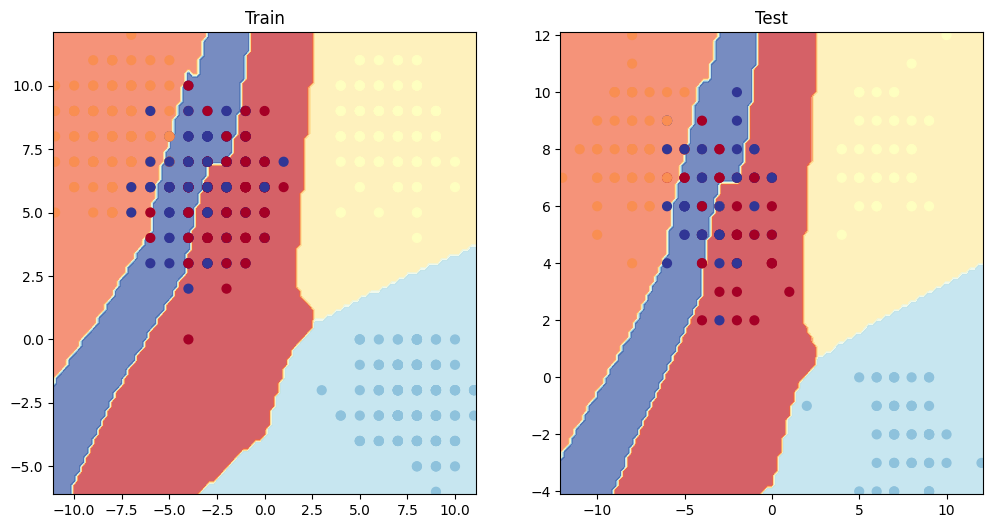

In [236]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_multi_clf, x_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_multi_clf, x_test, y_test)

###**Saving and Loading**

In [237]:
torch.save(model_multi_clf.state_dict(), "model_multi_clf")

In [238]:
loaded_model_multi_clf= nn.Sequential(nn.Linear(2,  16),
                               nn.ReLU(),
                               nn.Linear(16, 32),
                               nn.ReLU(),
                               nn.Linear(32, 64),
                               nn.ReLU(),
                               nn.Linear(64, 5))
loaded_model_multi_clf

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=5, bias=True)
)

In [239]:
loaded_model_multi_clf.load_state_dict(torch.load("model_multi_clf"))

<All keys matched successfully>

In [240]:
y_logits_test=model_multi_clf(x_test.type(torch.float))
y_preds_test= torch.argmax(torch.softmax(y_logits_test, dim=1), dim=1)
acc_fn(y_test, y_preds_test)

0.808

#**Torch.metrics**

In [241]:
pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [242]:
from torchmetrics import Accuracy

In [243]:
acc=Accuracy(task="multiclass", num_classes=5, )
acc(y_preds_test, y_test)

tensor(0.8080)